**ANALYSIS INVOLVED THE FOLLOWING QUESTINS TO BE ANSWERED:
a) Who removed the most number of posts from the website?
b) A pie chart of who removes the post from the website
c) Whose posts were removed most frequently?
d) Most Popular posts, by awards received
e) Comments distribution
d) Conclusion **


In [3]:
pip install pandasql


  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=885ef94281649aa6ca9e7114772ac547187fdd2e5a58af9b4b68cf5853c6de36
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandasql as ps #sql


In [6]:
df = pd.read_csv('/content/r_dataisbeautiful_posts.csv')
df.head()

<ipython-input-6-45215298ce18>:1: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/r_dataisbeautiful_posts.csv')


,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
0,ll1p9h,Wordcloud of trending video titles on YouTube ...,1,OmarZiada,OC: 1,NaN,0.0,[],1613473961,https://www.reddit.com/r/dataisbeautiful/comme...,0.0,False
1,ll1o4h,Wordcloud of trending videos on YouTube in the...,1,OmarZiada,OC: 1,moderator,0.0,[],1613473829,https://www.reddit.com/r/dataisbeautiful/comme...,1.0,False
2,ll15gx,Immunization in India. Source: https://niti.go...,1,Professional_Napper_,NaN,moderator,0.0,[],1613471541,https://www.reddit.com/r/dataisbeautiful/comme...,1.0,False
3,ll0iup,How to quickly estimate the impact of players ...,1,Viziball,NaN,automod_filtered,0.0,[],1613468624,https://www.reddit.com/r/dataisbeautiful/comme...,0.0,False
4,ll0g9a,How to quickly estimate the impact of players ...,1,Viziball,NaN,moderator,0.0,[],1613468281,https://www.reddit.com/r/dataisbeautiful/comme...,2.0,False


Checking for Missing values



In [7]:
df.isnull().sum().sort_values(ascending=False)

,0
author_flair_text,74728
removed_by,73702
awarders,39968
total_awards_received,29300
num_comments,1
over_18,1
id,0
title,0
score,0
author,0


**We can see that there are a lot of missing values in this dataset. However, because the data is being used for Exploratory Purposes, the missing values do not bother us much**

**Basic Data Exploration**

In [8]:
df.describe()

,score,total_awards_received,created_utc,num_comments
count,94446.000000,65146.000000,9.444600e+04,94445.000000
mean,177.668636,0.013109,1.571146e+09,32.279168
std,2137.488914,0.589425,2.553003e+07,233.113687
min,0.000000,0.000000,1.519799e+09,0.000000
25%,1.000000,0.000000,1.550800e+09,1.000000
50%,1.000000,0.000000,1.577090e+09,2.000000
75%,1.000000,0.000000,1.590953e+09,6.000000
max,105255.000000,93.000000,1.613474e+09,12508.000000


Based on the information provided, we can conclude that the "score" variable is heavily skewed towards the lower values, based on the quartile distribution.

This suggests that the majority of the data points have very low scores, with only a small number of data points having high scores. The presence of outliers with a very high score may also suggest that there are some extreme values that are skewing the distribution.

***Checking who removed the most Posts* **

In [9]:
removed_posts = """SELECT removed_by, count(distinct id) as posts_removed
                    FROM df
                    WHERE removed_by is not null
                    GROUP BY removed_by"""
df_removed_posts = ps.sqldf(removed_posts, locals())
df_removed_posts

,removed_by,posts_removed
0,author,1
1,automod_filtered,1553
2,deleted,2948
3,moderator,14789
4,reddit,1453


**Making a bar graph for the table above**

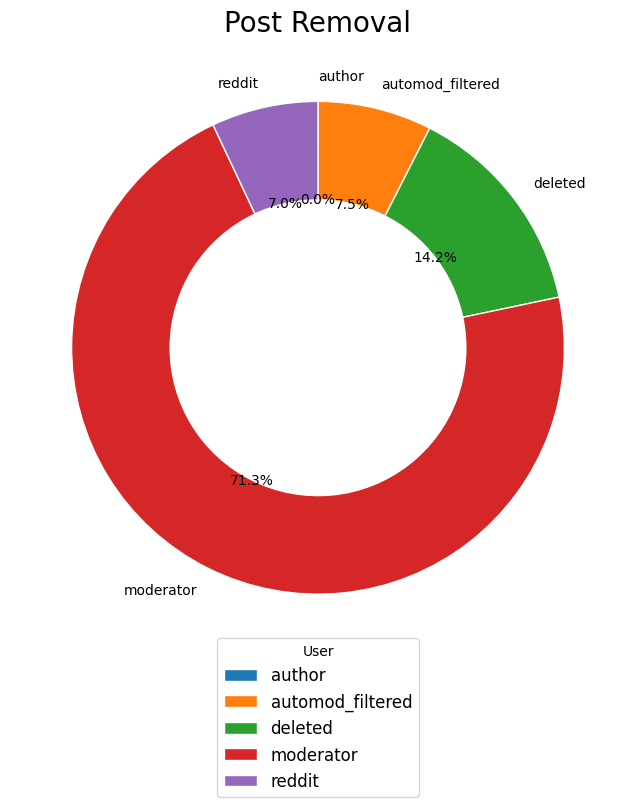

In [10]:
removed_by = df_removed_posts['removed_by'].tolist()
number_of_removed_posts = df_removed_posts['posts_removed'].tolist()

# Create pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(number_of_removed_posts, labels=removed_by, autopct='%1.1f%%', startangle=90,
       counterclock=False, wedgeprops=dict(width=0.4, edgecolor='w'))

# Add title and legend
ax.set_title('Post Removal', fontsize=20)
ax.legend(title='User', loc='center', bbox_to_anchor=(0.5, -0.1), fontsize=12)

We can see that most posts are removed by the moderator, showing that Reddit Moderators, who are generally unpaid, are actively enforcing subreddit rules to regulate their subreddit. The next question is, whose posts were removed most frequently?

In [11]:
top_removed = """SELECT author, count(id) as number_of_removed_posts
FROM df
WHERE removed_by is not null
GROUP BY author
ORDER BY 2 desc
limit 10"""
df_top_removed = ps.sqldf(top_removed, locals())
df_top_removed

,author,number_of_removed_posts
0,[deleted],2955
1,hornedviper9,235
2,RohanBAbu150,62
3,Mostafa_Dahroug,45
4,peter_mladenov,35
5,PerfctSmile,31
6,Lifeinsider123,28
7,licensecrack,26
8,elizabeth010258,24
9,Lisa580,22


**We can safely omit the first row, as the database categorises "deleted" as an author when it cannot directly attribute a post to an individual**

In [12]:
df_top_removed = df_top_removed.drop([0])

In [13]:
df_top_removed

,author,number_of_removed_posts
1,hornedviper9,235
2,RohanBAbu150,62
3,Mostafa_Dahroug,45
4,peter_mladenov,35
5,PerfctSmile,31
6,Lifeinsider123,28
7,licensecrack,26
8,elizabeth010258,24
9,Lisa580,22


Now, lets see the most popular posts, by total_awards_received

In [14]:
popular_posts = """SELECT title, total_awards_received as awards_received
FROM df
where title != 'data_irl'
order by 2 desc
limit 10"""
df_popular_posts = ps.sqldf(popular_posts, locals())
df_popular_posts

,title,awards_received
0,Robinhood is getting wrecked in the App Store ...,93.0
1,How many leaders the Queen saw coming and goin...,55.0
2,Citadel paid $88 million to Robinhood in Q3 20...,54.0
3,[OC] Vegetation of Africa 2019,38.0
4,Number of Wilhelm Screams per Lord of the Ring...,31.0
5,[OC] Most Popular Programming Languages accord...,30.0
6,Race and Hispanic origin by county [OC],27.0
7,[OC] Fails-To-Deliver data on GameStop (GME),24.0
8,Highest Grossing Box Office Bald Actors of Hol...,21.0
9,The best (&amp; worst) countries for raising a...,18.0


**Comments Distribution: **

*As seen in our quick statistics, an average reddit post has 28 comments. Lets see how the comments are distributed using a bar chart*

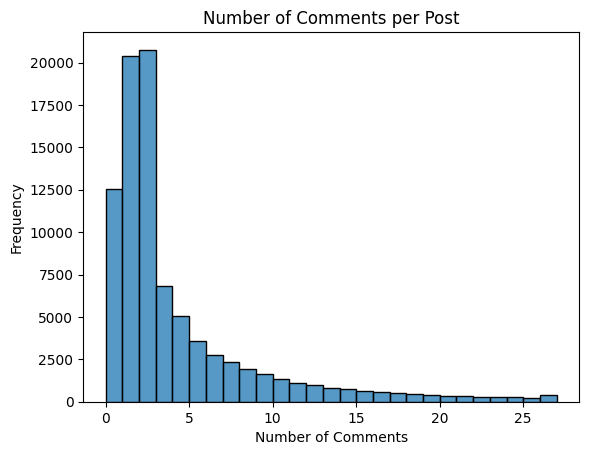

In [15]:
subset = df[df['num_comments'] < 28]
sns.histplot(data=subset, x='num_comments', binwidth=1)

# set the plot title and axis labels
plt.title('Number of Comments per Post')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')

# display the plot
plt.show()

As we can see, most posts still have less than 5 comments per post. From this, we can conclude that there are posts with an extremely high number of post which takes the mean to a very high value.



**CONCLUSION:**
*As we can see from the beginning, the dataset has a lot of outliers. The data, although heavily skewed, is consistent with what we should expect from a social media dataset, as there are very few posts with a lot of likes/awards or comments, while others garner very few peoples eye.*

THANKYOU.....................